In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df_cancer['target'] = cancer.target

X_cancer = df_cancer.drop('target', axis=1)
Y_cancer = df_cancer['target']

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(
    X_cancer, Y_cancer, test_size=0.3, random_state=101
)
print(df_cancer.head())
print('Train set shape:', X_train_c.shape)
print('Test set shape:', X_test_c.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
scaler_c = StandardScaler()

scaler_c.fit(X_train_c)

X_train_c_scaled = scaler_c.transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

df_train_c_scaled = pd.DataFrame(X_train_c_scaled, columns=X_cancer.columns)
print(df_train_c_scaled.describe())
knn_cancer = KNeighborsClassifier(n_neighbors=1)
knn_cancer.fit(X_train_c_scaled, Y_train_c)

        mean radius  mean texture  mean perimeter     mean area  \
count  3.980000e+02  3.980000e+02    3.980000e+02  3.980000e+02   
mean  -4.815802e-15  1.324457e-15   -1.008685e-15  7.007237e-16   
std    1.001259e+00  1.001259e+00    1.001259e+00  1.001259e+00   
min   -1.962948e+00 -2.197955e+00   -1.922573e+00 -1.409040e+00   
25%   -6.994600e-01 -7.395325e-01   -6.967683e-01 -6.761255e-01   
50%   -2.261573e-01 -9.832940e-02   -2.205841e-01 -3.021781e-01   
75%    4.750835e-01  5.834489e-01    4.982494e-01  3.216744e-01   
max    3.735923e+00  4.561537e+00    3.874681e+00  5.192092e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     3.980000e+02      3.980000e+02    3.980000e+02         3.980000e+02   
mean     -3.492460e-15     -7.397767e-16   -7.141133e-17        -5.645958e-16   
std       1.001259e+00      1.001259e+00    1.001259e+00         1.001259e+00   
min      -3.106701e+00     -1.596284e+00   -1.084206e+00        -1.23333

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predictions: [1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1]
ผลลัพธ์ K=1
Confusion matrix:
[[ 61   5]
 [  3 102]]
Classification report:
              precision    recall  f1-score   support

   malignant       0.95      0.92      0.94        66
      benign       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



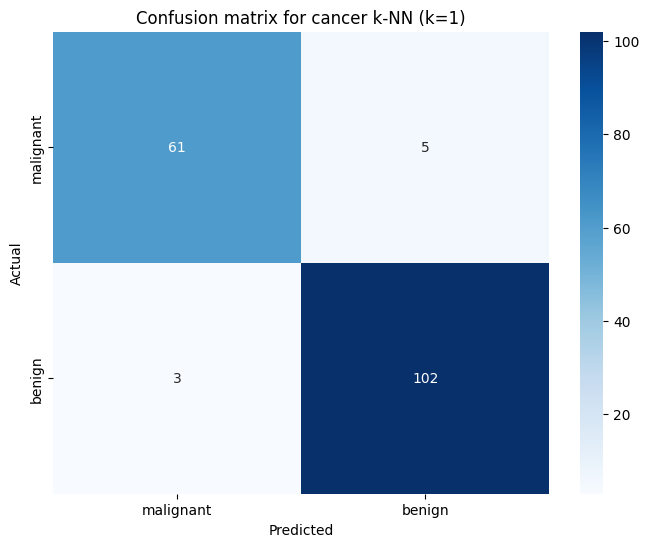

In [6]:
predictions_c = knn_cancer.predict(X_test_c_scaled)
print("Predictions:", predictions_c)
cm = confusion_matrix(Y_test_c, predictions_c)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for cancer k-NN (k=1)')
plt.show
print("ผลลัพธ์ K=1")
print("Confusion matrix:")
print(cm)
print("Classification report:")
print(classification_report(Y_test_c, predictions_c,target_names=cancer.target_names))